# Mushroom Classification

### In this project, we will examine the data and create a machine learning algorithm that will detect if the mushroom is edible or poisonous by its specifications

### Importing the packages

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

### Reading the csv file of the dataset

In [2]:
df = pd.read_csv("F:\mushrooms.csv")

In [3]:
pd.set_option('display.max_columns',None)

# Examining the Data

#### After importing the data, to learn more about the dataset, we'll use .head() .info() and .describe() methods.

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### Shape of the dataset

In [7]:
print("Dataset shape:", df.shape)

Dataset shape: (8124, 23)


### Visualizing the count of edible and poisonous mushrooms

In [8]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [9]:
df["class"].unique()

array(['p', 'e'], dtype=object)

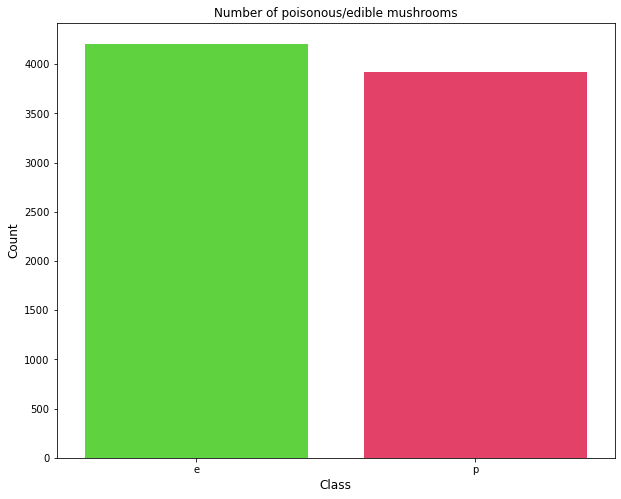

In [10]:
count = df['class'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(count.index, count.values, alpha=0.85, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
plt.show()

# Data Manipulation

### The data is categorical so we’ll use LabelEncoder to convert it to ordinal

In [11]:
df = df.astype('category')

In [12]:
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [13]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [14]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


###  The column "veil-type" is 0 and not contributing to the data so we remove it.

In [15]:
df['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

In [16]:
df=df.drop(["veil-type"],axis=1)

### Let's look at the correlation between the variables

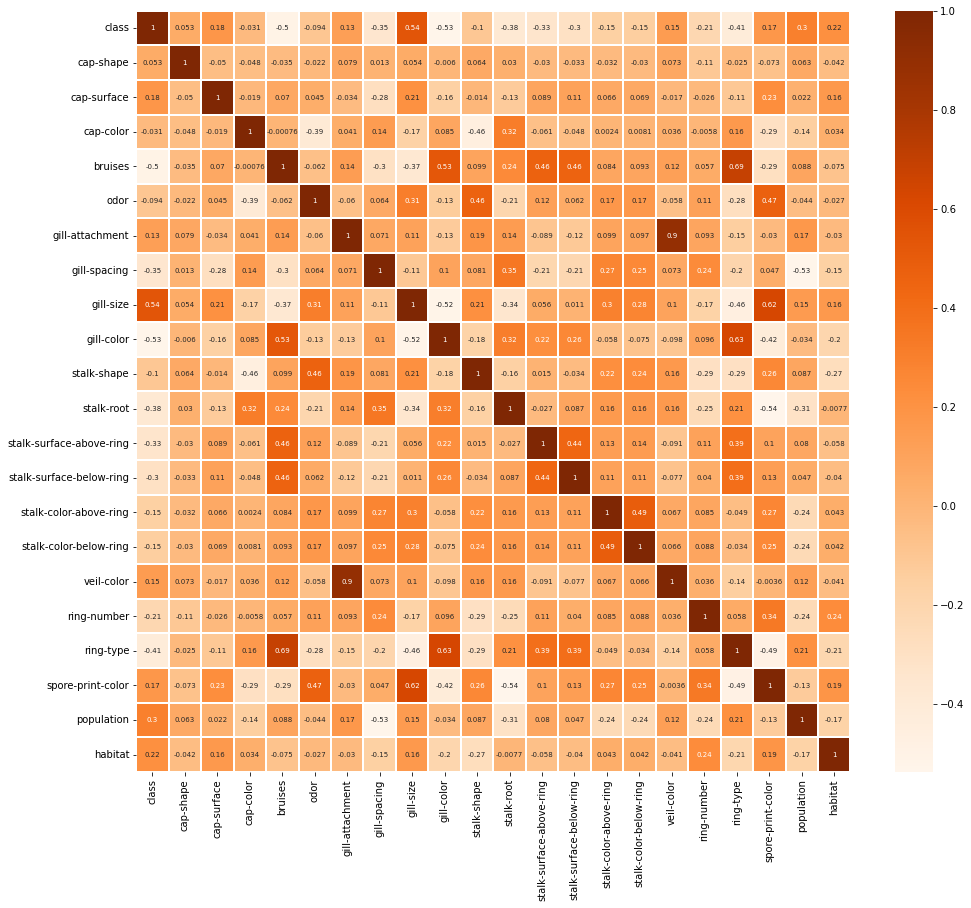

In [17]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(),linewidths=.1,cmap="Oranges", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

#### Usually, the least correlating variable is the most important one for classification. In this case, "gill-color" has -0.53 so let's look at it closely.

In [18]:
df[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


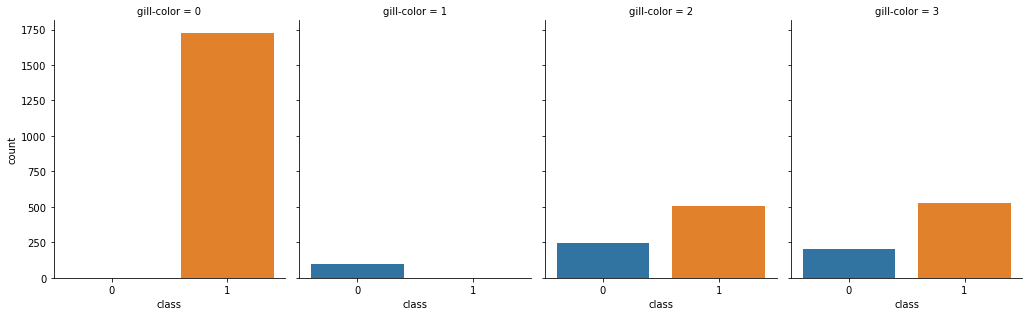

In [19]:
new_var = df[['class', 'gill-color']]
new_var = new_var[new_var['gill-color']<=3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);

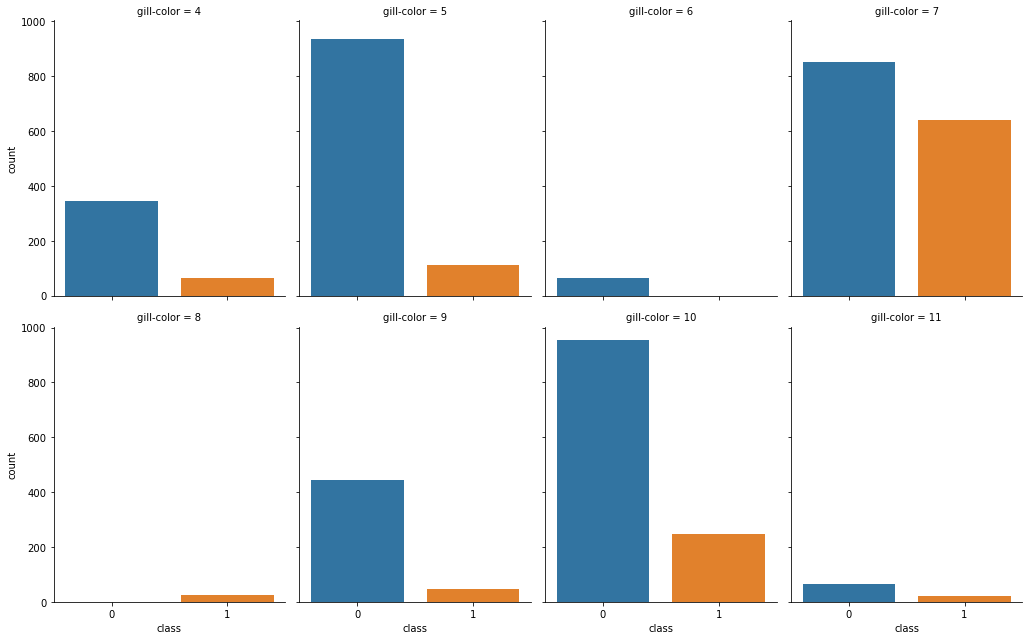

In [20]:
new_var=df[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']>3.5]

sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);

# Visualizations

In [21]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [22]:
def plot_col(col, hue=None, color=['red', 'lightgreen'], labels=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(col, hue=hue, palette=color, saturation=0.6, data=df, dodge=True, ax=ax)
    ax.set(title = f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")
    if labels!=None:
        ax.set_xticklabels(labels)
    if hue!=None:
        ax.legend(('Poisonous', 'Edible'), loc=0)

### Visualize the number of mushrooms for each cap categorize.

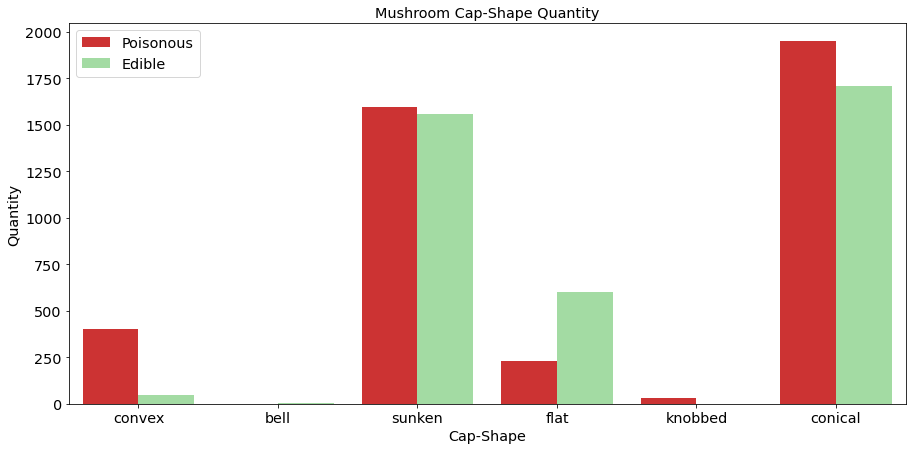

In [23]:
shape_dict = {"bell":"b","conical":"c","convex":"x","flat":"f", "knobbed":"k","sunken":"s"}
labels = ('convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical')
plot_col(col='cap-shape', hue='class', labels=labels)

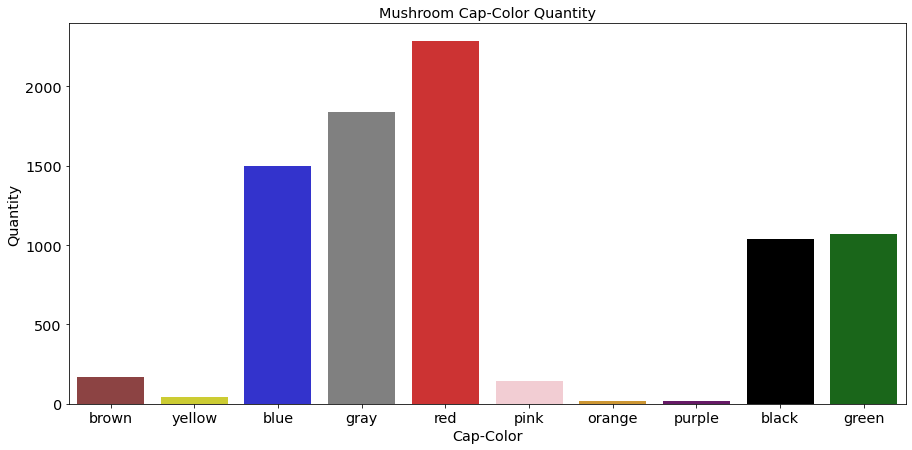

In [24]:
color_dict = {"brown":"n","yellow":"y", "blue":"w", "gray":"g", "red":"e","pink":"p",
              "orange":"b", "purple":"u", "black":"c", "green":"r"}
plot_col(col='cap-color', color=color_dict.keys(), labels=color_dict)

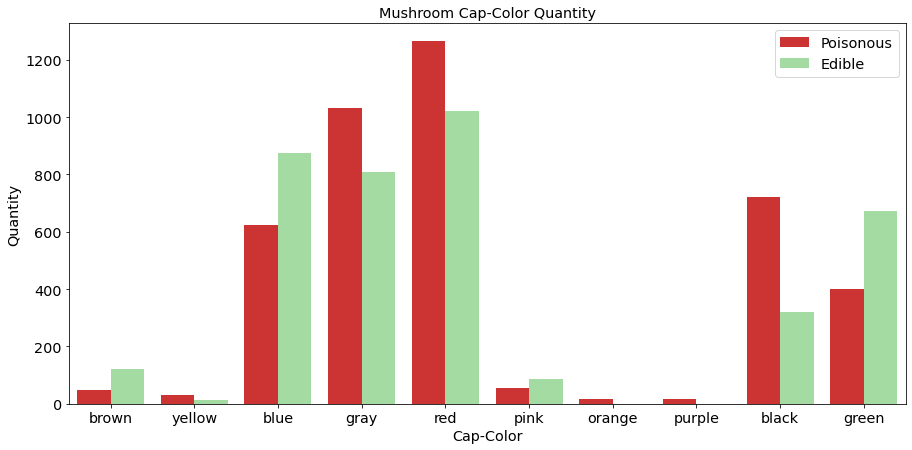

In [25]:
plot_col(col='cap-color', hue='class', labels=color_dict)

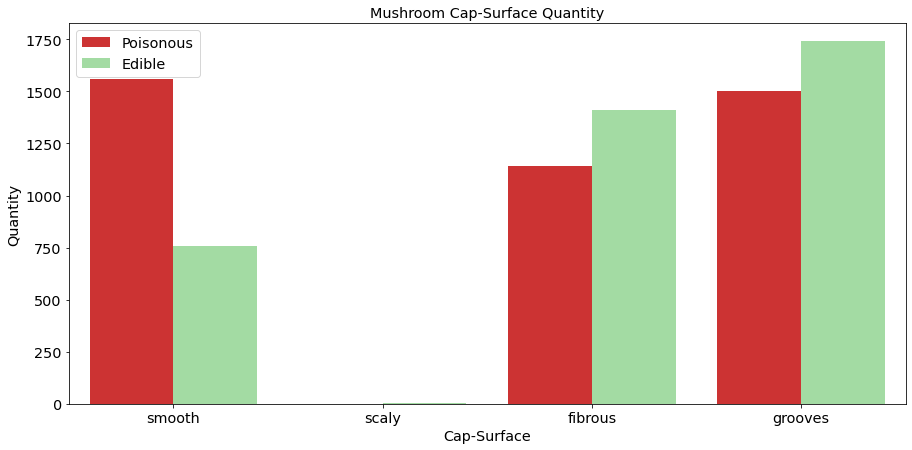

In [26]:
surface_dict = {"smooth":"s", "scaly":"y", "fibrous":"f","grooves":"g"}
plot_col(col='cap-surface', hue='class', labels=surface_dict)

# Model Building

In [27]:
X = df.drop(['class'] , axis = 1)
y = df['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=24)

## 1 .Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_predict, cross_val_score

In [30]:
print("Model RESULTS:\n")
print('Accuracy Score:---> {0:.4f}\n'.format(accuracy_score(y_train,lr.predict(X_train))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,lr.predict(X_train))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,lr.predict(X_train))))
res = cross_val_score(lr, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

Model RESULTS:

Accuracy Score:---> 0.9522

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2076
           1       0.95      0.95      0.95      1986

    accuracy                           0.95      4062
   macro avg       0.95      0.95      0.95      4062
weighted avg       0.95      0.95      0.95      4062


Confusion Matrix:
[[1986   90]
 [ 104 1882]]

Average Accuracy:	0.9503

Standard Deviation:	0.0081


In [31]:
print("TEST RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,lr.predict(X_test))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,lr.predict(X_test))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,lr.predict(X_test))))

TEST RESULTS:

Accuracy Score: 0.9493

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2132
           1       0.96      0.93      0.95      1930

    accuracy                           0.95      4062
   macro avg       0.95      0.95      0.95      4062
weighted avg       0.95      0.95      0.95      4062


Confusion Matrix:
[[2054   78]
 [ 128 1802]]



## 2. Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier as DT

dt = DT(criterion='entropy',random_state=35)
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=35)

In [33]:
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,dt.predict(X_train))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,dt.predict(X_train))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,dt.predict(X_train))))
res = cross_val_score(dt, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2076
           1       1.00      1.00      1.00      1986

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062


Confusion Matrix:
[[2076    0]
 [   0 1986]]

Average Accuracy:	1.0000

Standard Deviation:	0.0000


In [34]:
print("TEST RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,dt.predict(X_test))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,dt.predict(X_test))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,dt.predict(X_test))))

TEST RESULTS:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2132
           1       1.00      1.00      1.00      1930

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062


Confusion Matrix:
[[2132    0]
 [   0 1930]]



## 3. Support Vector Machines

In [35]:
from sklearn.svm import SVC

svm = SVC(random_state=24, gamma="auto", probability=True)
svm.fit(X_train, y_train)

SVC(gamma='auto', probability=True, random_state=24)

In [36]:
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,svm.predict(X_train))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,svm.predict(X_train))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,svm.predict(X_train))))
res = cross_val_score(svm, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2076
           1       1.00      1.00      1.00      1986

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062


Confusion Matrix:
[[2076    0]
 [   0 1986]]

Average Accuracy:	0.9998

Standard Deviation:	0.0007


In [37]:
print("TEST RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,svm.predict(X_test))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,svm.predict(X_test))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,svm.predict(X_test))))

TEST RESULTS:

Accuracy Score: 0.9998

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2132
           1       1.00      1.00      1.00      1930

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062


Confusion Matrix:
[[2132    0]
 [   1 1929]]



## 4.  Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB as NB

nb = NB()
nb.fit(X_train,y_train)

GaussianNB()

In [39]:
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,nb.predict(X_train))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,nb.predict(X_train))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,nb.predict(X_train))))
res = cross_val_score(nb, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 0.9234

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2076
           1       0.92      0.92      0.92      1986

    accuracy                           0.92      4062
   macro avg       0.92      0.92      0.92      4062
weighted avg       0.92      0.92      0.92      4062


Confusion Matrix:
[[1922  154]
 [ 157 1829]]

Average Accuracy:	0.9247

Standard Deviation:	0.0173


In [40]:
print("TEST RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,nb.predict(X_test))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,nb.predict(X_test))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,nb.predict(X_test))))

TEST RESULTS:

Accuracy Score: 0.9188

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2132
           1       0.92      0.91      0.91      1930

    accuracy                           0.92      4062
   macro avg       0.92      0.92      0.92      4062
weighted avg       0.92      0.92      0.92      4062


Confusion Matrix:
[[1976  156]
 [ 174 1756]]



## 5. Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [42]:
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,rf.predict(X_train))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,rf.predict(X_train))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,rf.predict(X_train))))
res = cross_val_score(rf, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2076
           1       1.00      1.00      1.00      1986

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062


Confusion Matrix:
[[2076    0]
 [   0 1986]]

Average Accuracy:	1.0000

Standard Deviation:	0.0000


In [43]:
print("TEST RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,rf.predict(X_test))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,rf.predict(X_test))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,rf.predict(X_test))))

TEST RESULTS:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2132
           1       1.00      1.00      1.00      1930

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062


Confusion Matrix:
[[2132    0]
 [   0 1930]]



In [44]:
Overall_score = [['Logistic Regression', 94], ['Decision Tree', 100], ['SVM', 99],['Naive Bayes',93],['Random Forest',100]]
  
# Create the pandas DataFrame
Model_Score = pd.DataFrame(Overall_score, columns=['Model_Name', 'Prediction Accuracy'])
  
Model_Score

,Model_Name,Prediction Accuracy
0,Logistic Regression,94
1,Decision Tree,100
2,SVM,99
3,Naive Bayes,93
4,Random Forest,100


In [45]:
y_pred=rf.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [47]:
columns = df.columns

In [49]:
fea_imp = {'columns':columns[1:].tolist(), 'importance':rf.feature_importances_}
feature_importance = pd.DataFrame(fea_imp)
feature_importance.sort_values('importance',ascending = False, inplace=True)
feature_importance = feature_importance.reset_index().drop('index', axis=1)
feature_importance

,columns,importance
0,odor,0.240581
1,gill-color,0.125462
2,spore-print-color,0.118404
3,gill-size,0.077599
4,stalk-root,0.058138
5,ring-type,0.052090
6,population,0.051565
7,gill-spacing,0.038764
8,bruises,0.033019
9,stalk-shape,0.030838


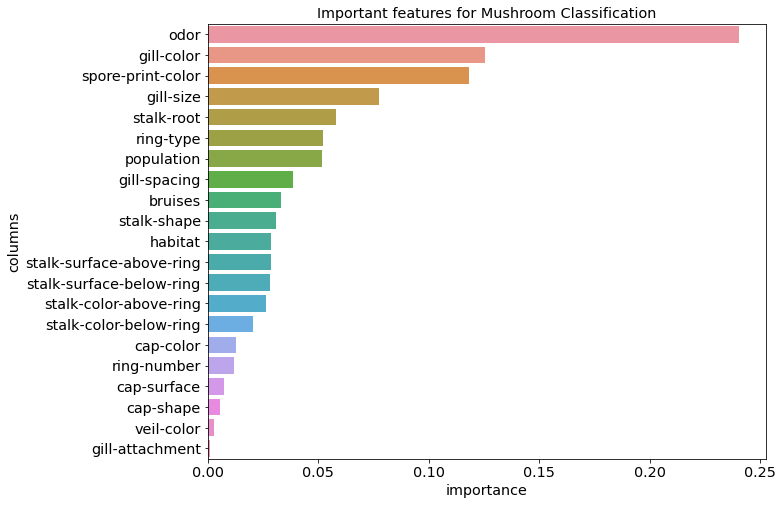

In [50]:
plt.figure(figsize=(10,8))
sns.barplot(y='columns',x='importance', data=feature_importance).set(title='Important features for Mushroom Classification')
plt.show()

In [62]:
use_cols = feature_importance[feature_importance['importance']>0.025]['columns'].tolist()
use_cols.append('class')
use_cols

['odor',
 'gill-color',
 'spore-print-color',
 'gill-size',
 'stalk-root',
 'ring-type',
 'population',
 'gill-spacing',
 'bruises',
 'stalk-shape',
 'habitat',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'class']

In [64]:
final_data = df[use_cols]
final_data

,odor,gill-color,spore-print-color,gill-size,stalk-root,ring-type,population,gill-spacing,bruises,stalk-shape,habitat,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,class
0,6,4,2,1,3,4,3,0,1,0,5,2,2,7,1
1,0,4,3,0,2,4,2,0,1,0,1,2,2,7,0
2,3,5,3,0,2,4,2,0,1,0,3,2,2,7,0
3,6,5,2,1,3,4,3,0,1,0,5,2,2,7,1
4,5,4,3,0,3,0,0,1,0,1,1,2,2,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,5,11,0,0,0,4,1,0,0,0,2,2,2,5,0
8120,5,11,0,0,0,4,4,0,0,0,2,2,2,5,0
8121,5,5,0,0,0,4,1,0,0,0,2,2,2,5,0
8122,8,0,7,1,0,0,4,0,0,1,2,2,1,7,1


In [65]:
# Spliting into X, y
X_label = final_data.iloc[:,:-1]
y_label = final_data.iloc[:,-1]

# X_lable, y_lable

In [68]:
X_labe

,odor,gill-color,spore-print-color,gill-size,stalk-root,ring-type,population,gill-spacing,bruises,stalk-shape,habitat,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring
0,6,4,2,1,3,4,3,0,1,0,5,2,2,7
1,0,4,3,0,2,4,2,0,1,0,1,2,2,7
2,3,5,3,0,2,4,2,0,1,0,3,2,2,7
3,6,5,2,1,3,4,3,0,1,0,5,2,2,7
4,5,4,3,0,3,0,0,1,0,1,1,2,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,5,11,0,0,0,4,1,0,0,0,2,2,2,5
8120,5,11,0,0,0,4,4,0,0,0,2,2,2,5
8121,5,5,0,0,0,4,1,0,0,0,2,2,2,5
8122,8,0,7,1,0,0,4,0,0,1,2,2,1,7


In [69]:
Xl_train, Xl_test, yl_train, yl_test = train_test_split(X_label, y_label, test_size = 0.2, random_state = 0)

In [70]:
rf_1 = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
rf_1.fit(Xl_train, yl_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [73]:
#Predict for X dataset
y_train_predict_tree = rf_1.predict(Xl_train)

train_acc_score = accuracy_score(yl_train, y_train_predict_tree)
print('Train Accuracy Score : ' , train_acc_score)

# print classification report
print('\n\n',classification_report(yl_train, y_train_predict_tree, digits=4))

Train Accuracy Score :  1.0


               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3356
           1     1.0000    1.0000    1.0000      3143

    accuracy                         1.0000      6499
   macro avg     1.0000    1.0000    1.0000      6499
weighted avg     1.0000    1.0000    1.0000      6499



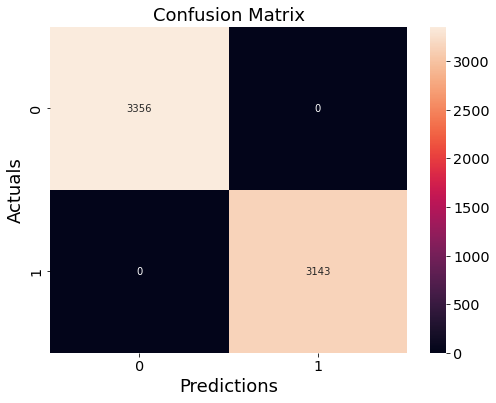

In [74]:
cm = confusion_matrix(yl_train,y_train_predict_tree)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='.0f')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [75]:
y_test_predict_tree = rf_1.predict(Xl_test)

test_acc_score = accuracy_score(yl_test, y_test_predict_tree)
print('Test Accuracy Score : ' , test_acc_score)
# print classification report
print('\n\n',classification_report(yl_test, y_test_predict_tree, digits=4))

Test Accuracy Score :  1.0


               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       852
           1     1.0000    1.0000    1.0000       773

    accuracy                         1.0000      1625
   macro avg     1.0000    1.0000    1.0000      1625
weighted avg     1.0000    1.0000    1.0000      1625



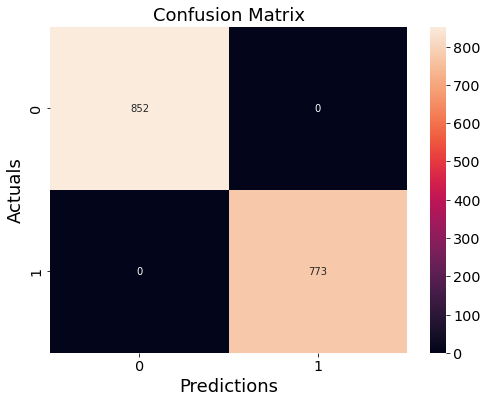

In [77]:
cm = confusion_matrix(yl_test,y_test_predict_tree)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='.0f')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [79]:
import pickle

In [81]:
#Creating Pickle file
filename = 'mushrooms_rf.pkl'
pickle.dump(rf_1, open(filename, 'wb'))